1 – Preparação do ambiente
Neste primeiro trecho você estabelece todo o “arsenal” necessário para o experimento:

Bibliotecas de visualização (matplotlib, seaborn) – permitem construir plots de dispersão e gráficos de barras com controle fino de aparência.

sklearn.datasets.load_iris – dá acesso direto ao famoso dataset Iris já pré-processado, evitando baixar arquivos externos.

Componentes de machine learning do scikit-learn:

RandomForestClassifier (algoritmo de ensemble que cria várias árvores de decisão independentes e agrega suas previsões).

train_test_split (separa os dados em subconjuntos mutuamente exclusivos para avaliação justa).

Métricas (classification_report, accuracy_score) para quantificar desempenho.

pandas – fornece estruturas tabulares que facilitam inspeção, filtragem e plotting dos dados.

O bloco garante que todo o pipeline – da carga dos dados à avaliação e visualização – esteja suportado pelas bibliotecas corretas em memória.

In [ ]:
# 1 -  Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

2 – Carga e decomposição do dataset
O dataset Iris é instanciado na memória e seus elementos principais são desmembrados:

X guarda as quatro variáveis numéricas (medidas de sépala e pétala).

y contém os rótulos (0, 1, 2) que representam as três espécies.

feature_names e target_names oferecem metadados legíveis (nomes das colunas e das classes) necessários para gráficos e relatórios laterais.

O objetivo é isolar a matriz de atributos e o vetor-alvo em estruturas independentes, pois cada etapa subsequente — treinamento, avaliação e plotting — exige esses objetos em formatos diferentes.

In [ ]:
# 2 - Carregando o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

3 – Conversão para DataFrame
Aqui os dados brutos são embrulhados num pandas.DataFrame, adicionando:

Nome de coluna semântico: torna o código autoexplicativo ao referenciar variáveis pelo nome real em vez de índice numérico.

Coluna species com rótulos textuais, gerada por compreensão de lista, o que transforma as classes inteiras “0/1/2” em “setosa / versicolor / virginica”.

Esse formato tabular enriquece a análise exploratória e se integra naturalmente às funções de plotting do Seaborn, que operam direto sobre DataFrame.

In [ ]:
# 3 - Convertendo para DataFrame para facilitar a visualização
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

4 – Particionamento treino / teste
Divide-se o conjunto de 150 amostras em dois subconjuntos:

80 % (treino): material visto pelo algoritmo para aprender padrões.

20 % (teste): amostras “desconhecidas” que simulam dados futuros e servem como auditagem imparcial.

O random_state fixa a semente de geração de números aleatórios, garantindo reprodutibilidade do resultado em execuções diferentes.

In [ ]:
# 4 -  Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5 – Instanciação e treinamento do Random Forest
Instanciação: define-se uma floresta com 100 árvores independentes. Cada árvore aprende em subconjuntos aleatórios de amostras e atributos, favorecendo diversidade.

fit: varre o conjunto de treino, criando as estruturas de decisão que particionam o espaço de atributos para minimizar impureza em cada nó. O processo de ensemble reduz overfitting em relação a uma única árvore

In [ ]:
# 5 -  Criando e treinando o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

6 – Previsão e avaliação quantitativa
predict aplica o modelo já treinado ao subconjunto de teste, gerando rótulos previstos.

Acurácia: proporção de acertos sobre o total de exemplos de teste. Fornece uma visão geral mas não mostra nuances de cada classe.

classification_report: devolve precisão, revocação (recall) e F1-score por classe, além das médias. Permite avaliar se o modelo privilegia uma espécie em detrimento de outra e confirma se o desempenho não se deve a desequilíbrios de classe.

In [ ]:
# 6 -  Previsões e avaliação
y_pred = rf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names))


Acurácia: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



7 – Gráfico de dispersão 2D
Selecionam-se as duas primeiras variáveis (comprimento e largura da sépala) como eixos cartesianos:

Cada ponto representa uma flor;

A coloração pelo atributo species revela agrupamentos naturais (setosa aparece claramente separada; versicolor e virginica sobrepõem-se parcialmente).

Esse scatter plot ilustra visualmente como as espécies se distribuem num recorte bidimensional e ajuda a entender a facilidade (ou dificuldade) que o classificador terá em separá-las.

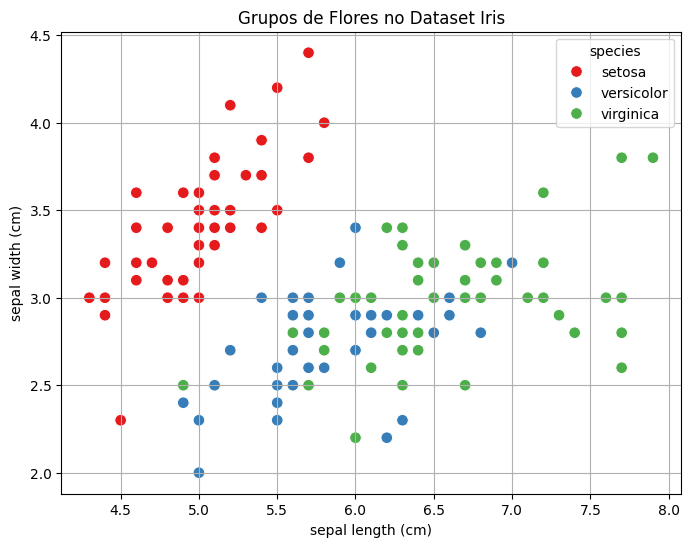

In [ ]:
# 7 -  Gráfico de dispersão 2D (usando as duas primeiras variáveis para visualização)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=feature_names[0], y=feature_names[1], hue='species', palette='Set1', s=70)
plt.title("Grupos de Flores no Dataset Iris")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True)
plt.show()

8 – Gráfico de importância das variáveis
Após o treinamento, o Random Forest calcula feature_importances_:

Para cada variável, soma-se a redução média de impureza produzida ao aparecer nos nós divididores das árvores.

Um bar plot classifica essas importâncias, mostrando, por exemplo, que as medidas de pétala costumam ter peso muito maior que as de sépala na distinção entre versicolor e virginica.

Essa etapa traduz o “caixa-preta” do ensemble em insight interpretável, indicando quais atributos realmente sustentam as decisões do modelo e orientando, se necessário, a coleta de dados ou a simplificação futura do conjunto de variáveis.

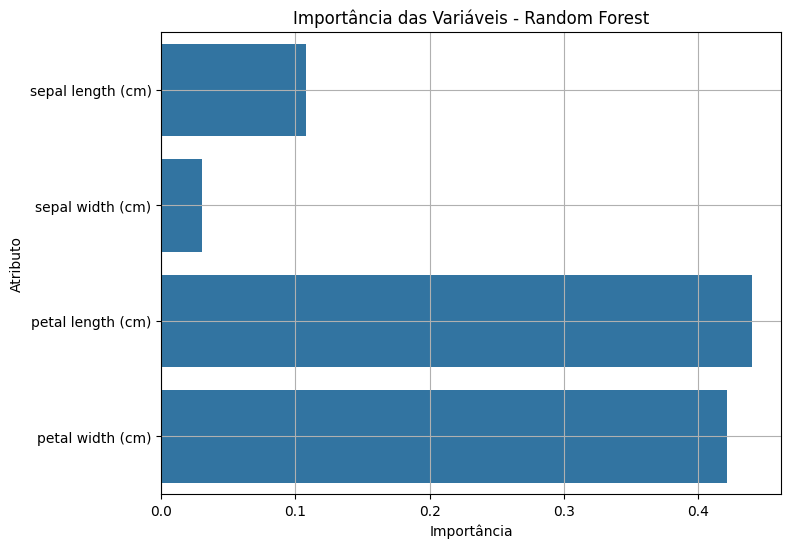

In [ ]:
# 8 -  Importância das variáveis
importances = rf.feature_importances_
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.grid(True)
plt.show()
